In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('datasets/stroke_data.csv')
print(df.shape)
df.head()

(4000, 11)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,73,0,0,1,Private,1,143.509078,29.160236,formerly smoked,1
1,Female,49,0,0,1,Private,0,85.230000,25.400000,Unknown,0
2,Male,58,0,0,1,Private,0,197.174377,34.870606,formerly smoked,1
3,Female,69,0,0,1,Self-employed,1,99.680000,17.600000,formerly smoked,0
4,Male,60,0,0,1,Private,0,69.200000,30.900000,never smoked,0


In [3]:
df.stroke.value_counts()

0    2027
1    1973
Name: stroke, dtype: int64

In [4]:
df.isnull().any()

gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool

Text(0.5, 1.0, 'Зависимость целевой переменной от возраста')

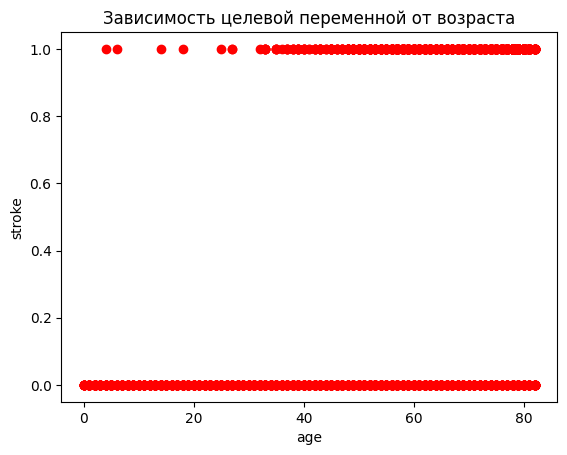

In [6]:
plt.plot(df['age'], df.stroke, 'ro')
plt.xlabel('age')
plt.ylabel('stroke')
plt.title('Зависимость целевой переменной от возраста')

In [7]:
X = df.drop(['stroke'], axis=1)
y = df.stroke

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [10]:
logreg = LogisticRegression()

In [11]:
train_cols = ['age']
logreg.fit(X_train[train_cols], y_train)

LogisticRegression()

In [13]:
pred = logreg.predict(X_test[train_cols])
accuracy_score(y_test, pred)

0.7683333333333333

In [15]:
confusion_matrix(y_test, pred)

array([[448, 156],
       [122, 474]])

In [19]:
train_cols = ['age', 'heart_disease']
logreg.fit(X_train[train_cols], y_train)

LogisticRegression()

In [20]:
pred = logreg.predict(X_test[train_cols])
print(accuracy_score(y_test, pred))
confusion_matrix(y_test, pred)

0.785


array([[457, 147],
       [111, 485]])

In [21]:
logreg.predict_proba(X_test[train_cols])

array([[0.85219662, 0.14780338],
       [0.97878403, 0.02121597],
       [0.83988949, 0.16011051],
       ...,
       [0.94222814, 0.05777186],
       [0.99426236, 0.00573764],
       [0.9923954 , 0.0076046 ]])

In [22]:
logreg.coef_

array([[ 0.0945283 , -1.22020129]])

In [25]:
for col, i in zip(train_cols, logreg.coef_[0]):
    print(f'Коэффициент при колонке: {col} = {i}')

Коэффициент при колонке: age = 0.094528302288334
Коэффициент при колонке: heart_disease = -1.220201286919679


In [26]:
logreg.intercept_ # Значение свободного члена

array([-5.43853816])

In [27]:
logreg.score(X_train[train_cols], y_train)

0.7725

In [29]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [30]:
logreg_tuned = LogisticRegression(penalty='l1', solver='saga')
logreg_tuned.fit(X_train[train_cols], y_train)

/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty='l1', solver='saga')

In [34]:
pred2 = logreg_tuned.predict(X_test[train_cols])
print(accuracy_score(y_test, pred2))
confusion_matrix(y_test, pred2)

0.7858333333333334


array([[429, 175],
       [ 82, 514]])

In [35]:
for col, i in zip(train_cols, logreg_tuned.coef_[0]):
    print(f'Коэффициент при колонке: {col} = {i}')

Коэффициент при колонке: age = 0.06476378037088541
Коэффициент при колонке: heart_disease = -0.5177297092134798
